## INITIALISATION


In [318]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ta.momentum import RSIIndicator
from ta.trend import MACD
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit     
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)


In [267]:
symbols = ["RELIANCE.NS", "HDFCBANK.NS", "INFY.NS"]

In [268]:
for symbol in symbols:   
    stock = yf.Ticker(symbol)
    info = stock.info
    print(f"Symbol: {symbol}")
    print(f"Name: {info.get('shortName', 'N/A')}")
    print(f"Market: {info.get('market', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print("-" * 30)

Symbol: RELIANCE.NS
Name: RELIANCE INDUSTRIES LTD
Market: in_market
Sector: Energy
------------------------------
Symbol: HDFCBANK.NS
Name: HDFC BANK LTD
Market: in_market
Sector: Financial Services
------------------------------
Symbol: INFY.NS
Name: INFOSYS LIMITED
Market: in_market
Sector: Technology
------------------------------


## DATA VISUALISATION


Historical Data for HDFCBANK.NS for the last 6 months:
+---------------------------+----------+----------+----------+----------+-------------+-------------+----------------+
| Date                      |     Open |     High |      Low |    Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+----------+----------+----------+----------+-------------+-------------+----------------|
| 2020-08-03 00:00:00+05:30 |  974.173 |  975.123 |  942.886 |  951.432 | 1.58918e+07 |           0 |              0 |
| 2020-08-04 00:00:00+05:30 |  957.129 | 1007.5   |  952.381 |  989.081 | 3.01531e+07 |           0 |              0 |
| 2020-08-05 00:00:00+05:30 |  995.063 | 1002.52  |  968.523 |  975.692 | 1.66107e+07 |           0 |              0 |
| 2020-08-06 00:00:00+05:30 |  984.665 | 1001.76  |  974.458 |  988.179 | 1.68234e+07 |           0 |              0 |
| 2020-08-07 00:00:00+05:30 |  982.624 |  994.351 |  969.093 |  991.17  | 1.24184e+07 |           0 |           

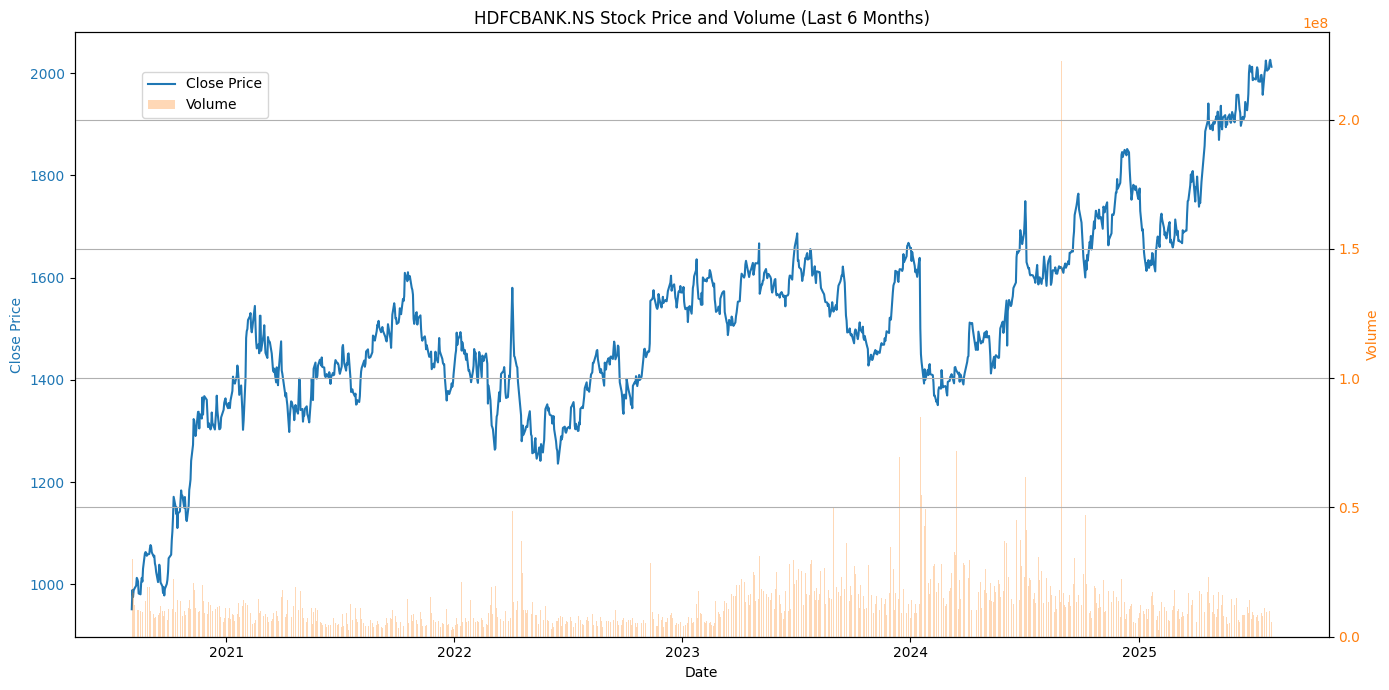

In [269]:
#we will fetch data for the last 6 months for each stock and plot the close price and volume
symbol = 'HDFCBANK.NS'
period = '5y'  

stock = yf.Ticker(symbol)
data = stock.history(period=period)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} for the last 6 months:")
formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))


# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title(f'{symbol} Stock Price and Volume (Last 6 Months)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()

Historical Data for RELIANCE.NS for the last 6 months:
+---------------------------+----------+----------+----------+----------+-------------+-------------+----------------+
| Date                      |     Open |     High |      Low |    Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+----------+----------+----------+----------+-------------+-------------+----------------|
| 2020-08-03 00:00:00+05:30 |  933.838 |  936.433 |  911.896 |  914.582 | 4.67154e+07 |           0 |              0 |
| 2020-08-04 00:00:00+05:30 |  919.862 |  986.51  |  910.598 |  979.044 | 9.20411e+07 |           0 |              0 |
| 2020-08-05 00:00:00+05:30 |  987.42  |  999.712 |  964.34  |  968.05  | 7.455e+07   |           0 |              0 |
| 2020-08-06 00:00:00+05:30 |  981.957 |  986.829 |  959.559 |  971.532 | 4.9323e+07  |           0 |              0 |
| 2020-08-07 00:00:00+05:30 |  969.575 |  982.322 |  965.205 |  977.155 | 3.29844e+07 |           0 |           

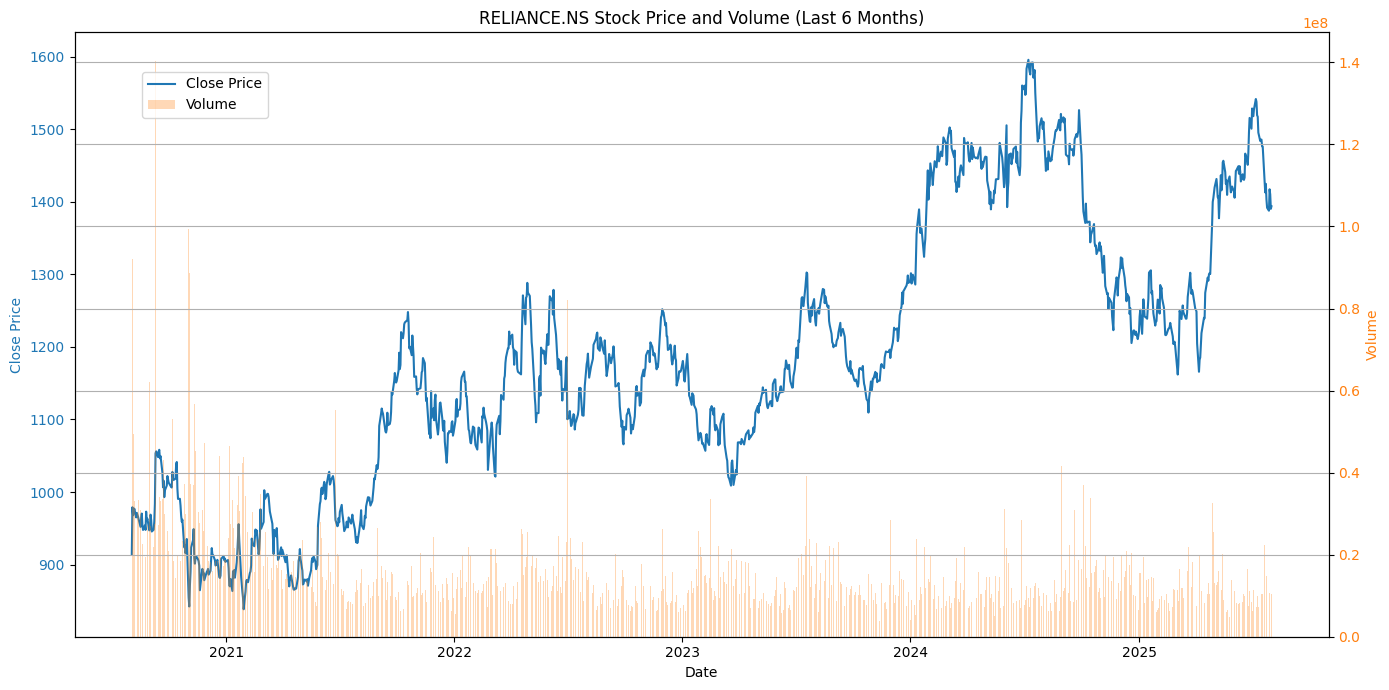

In [270]:
#we will fetch data for the last 6 months for each stock and plot the close price and volume
symbol = 'RELIANCE.NS'
period = '5y'  

stock = yf.Ticker(symbol)
data = stock.history(period=period)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} for the last 6 months:")
formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))


# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title(f'{symbol} Stock Price and Volume (Last 6 Months)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()

Historical Data for INFY.NS for the last 6 months:
+---------------------------+----------+----------+----------+----------+-------------+-------------+----------------+
| Date                      |     Open |     High |      Low |    Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+----------+----------+----------+----------+-------------+-------------+----------------|
| 2020-08-03 00:00:00+05:30 |  853.778 |  858.581 |  842.617 |  851.021 | 8.47979e+06 |           0 |              0 |
| 2020-08-04 00:00:00+05:30 |  854.179 |  863.294 |  836.48  |  844.751 | 1.11332e+07 |           0 |              0 |
| 2020-08-05 00:00:00+05:30 |  846.663 |  854.623 |  834.479 |  840.171 | 9.61418e+06 |           0 |              0 |
| 2020-08-06 00:00:00+05:30 |  847.998 |  866.585 |  838.215 |  863.428 | 1.09765e+07 |           0 |              0 |
| 2020-08-07 00:00:00+05:30 |  862.183 |  862.183 |  843.996 |  845.685 | 8.01095e+06 |           0 |              0

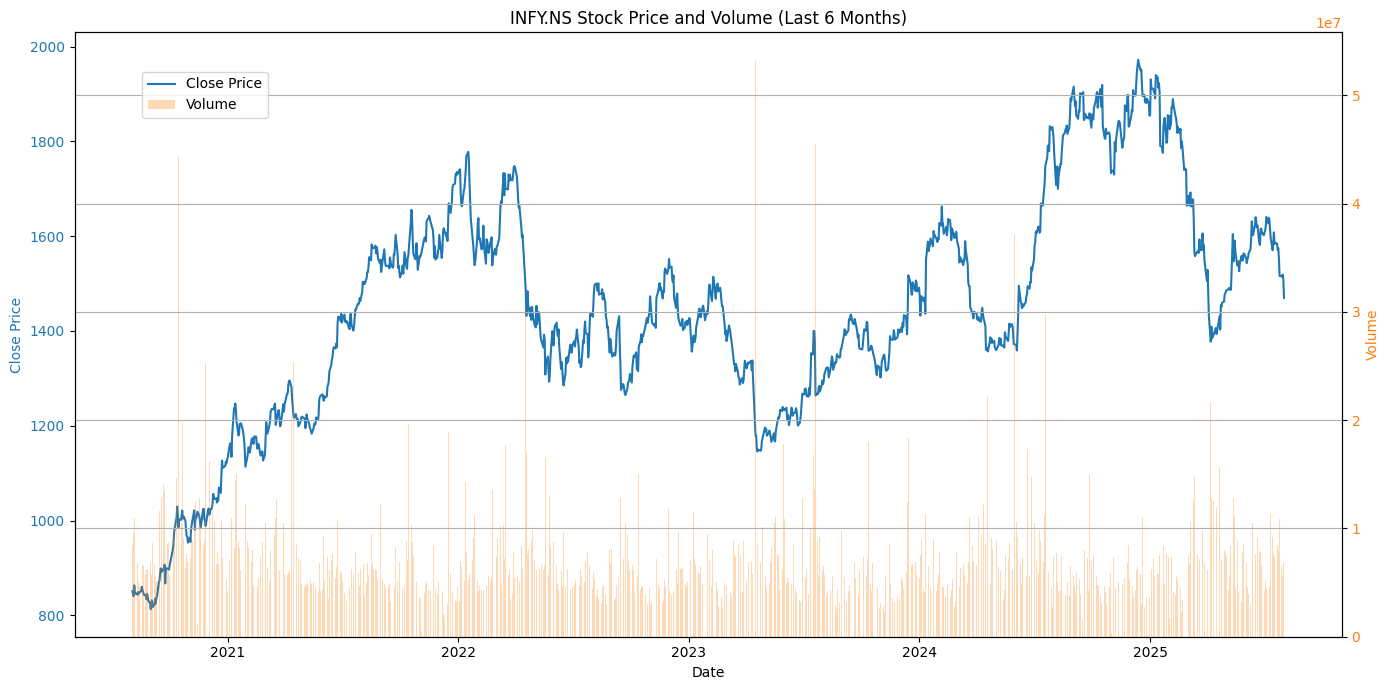

In [271]:
#we will fetch data for the last 6 months for each stock and plot the close price and volume
symbol = 'INFY.NS'
period = '5y'  

stock = yf.Ticker(symbol)
data = stock.history(period=period)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} for the last 6 months:")
formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))


# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')


plt.title(f'{symbol} Stock Price and Volume (Last 6 Months)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()

## PREPROCESSING THE DATA

In [342]:
# Define symbols and period
symbols = ["INFY.NS", "RELIANCE.NS", "HDFCBANK.NS"]
period = "5y"

# Preprocessing function
def preprocess_stock(df, rsi_threshold=35):
    df = df.copy()
    
    # Technical Indicators
    df["RSI"] = RSIIndicator(df["Close"], window=14).rsi()
    df["MACD"] = MACD(df["Close"]).macd()
    df["MACD_Signal"] = MACD(df["Close"]).macd_signal()
    df["SMA_20"] = df["Close"].rolling(window=20).mean()
    df["SMA_50"] = df["Close"].rolling(window=50).mean()
    df["EMA_20"] = df["Close"].ewm(span=20, adjust=False).mean()
    df["Volatility"] = df["Close"].rolling(window=10).std()
    
    # Strategy Signals (RSI < 35 and SMA_20 > SMA_50)
    df["Buy_Signal"] = ((df["RSI"] < rsi_threshold) & (df["SMA_20"] > df["SMA_50"])).astype(int)
    df["Logic_Signal"] = df["Buy_Signal"]  # For ML vs. Logic comparison
    df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)  # Next-day price increase
    
    # Ensure datetime index is timezone-aware
    df.index = pd.to_datetime(df.index).tz_convert("Asia/Kolkata")
    return df.dropna()

In [343]:
# Fetch and preprocess data for each stock
processed_data_dict = {}

for symbol in symbols:
    print(f"\nFetching data for {symbol}")
    data = yf.Ticker(symbol).history(period=period)
    if data.empty:
        print(f"Error: No data retrieved for {symbol}")
        continue
    processed_data = preprocess_stock(data)
    processed_data_dict[symbol] = processed_data
    print(f"Processed data for {symbol}: {len(processed_data)} rows")
    print(f"Data from {processed_data.index.min()} to {processed_data.index.max()}")
    print(f"Index timezone: {processed_data.index.tz}")
    print(f"\nSample processed data for {symbol}:")
    print(processed_data[["Close", "RSI", "MACD", "SMA_20", "SMA_50", "Buy_Signal", "Target"]].tail())


Fetching data for INFY.NS
Processed data for INFY.NS: 1191 rows
Data from 2020-10-12 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Index timezone: Asia/Kolkata

Sample processed data for INFY.NS:
                                 Close        RSI       MACD       SMA_20  \
Date                                                                        
2025-07-28 00:00:00+05:30  1516.000000  32.516792 -15.451989  1591.704999   
2025-07-29 00:00:00+05:30  1513.699951  32.118653 -18.410624  1587.049994   
2025-07-30 00:00:00+05:30  1519.000000  34.120385 -20.096039  1582.474994   
2025-07-31 00:00:00+05:30  1509.000000  32.191520 -21.985228  1576.989996   
2025-08-01 00:00:00+05:30  1469.599976  25.963703 -26.357839  1568.434998   

                                SMA_50  Buy_Signal  Target  
Date                                                        
2025-07-28 00:00:00+05:30  1585.859570           1       0  
2025-07-29 00:00:00+05:30  1585.354634           1       1  
2025-07-30 00:00:00+0

In [344]:
# Access processed DataFrames
processed_infy = processed_data_dict.get("INFY.NS")
processed_reliance = processed_data_dict.get("RELIANCE.NS")
processed_hdfcbank = processed_data_dict.get("HDFCBANK.NS")


Plotting technical indicators for INFY.NS (122 data points)


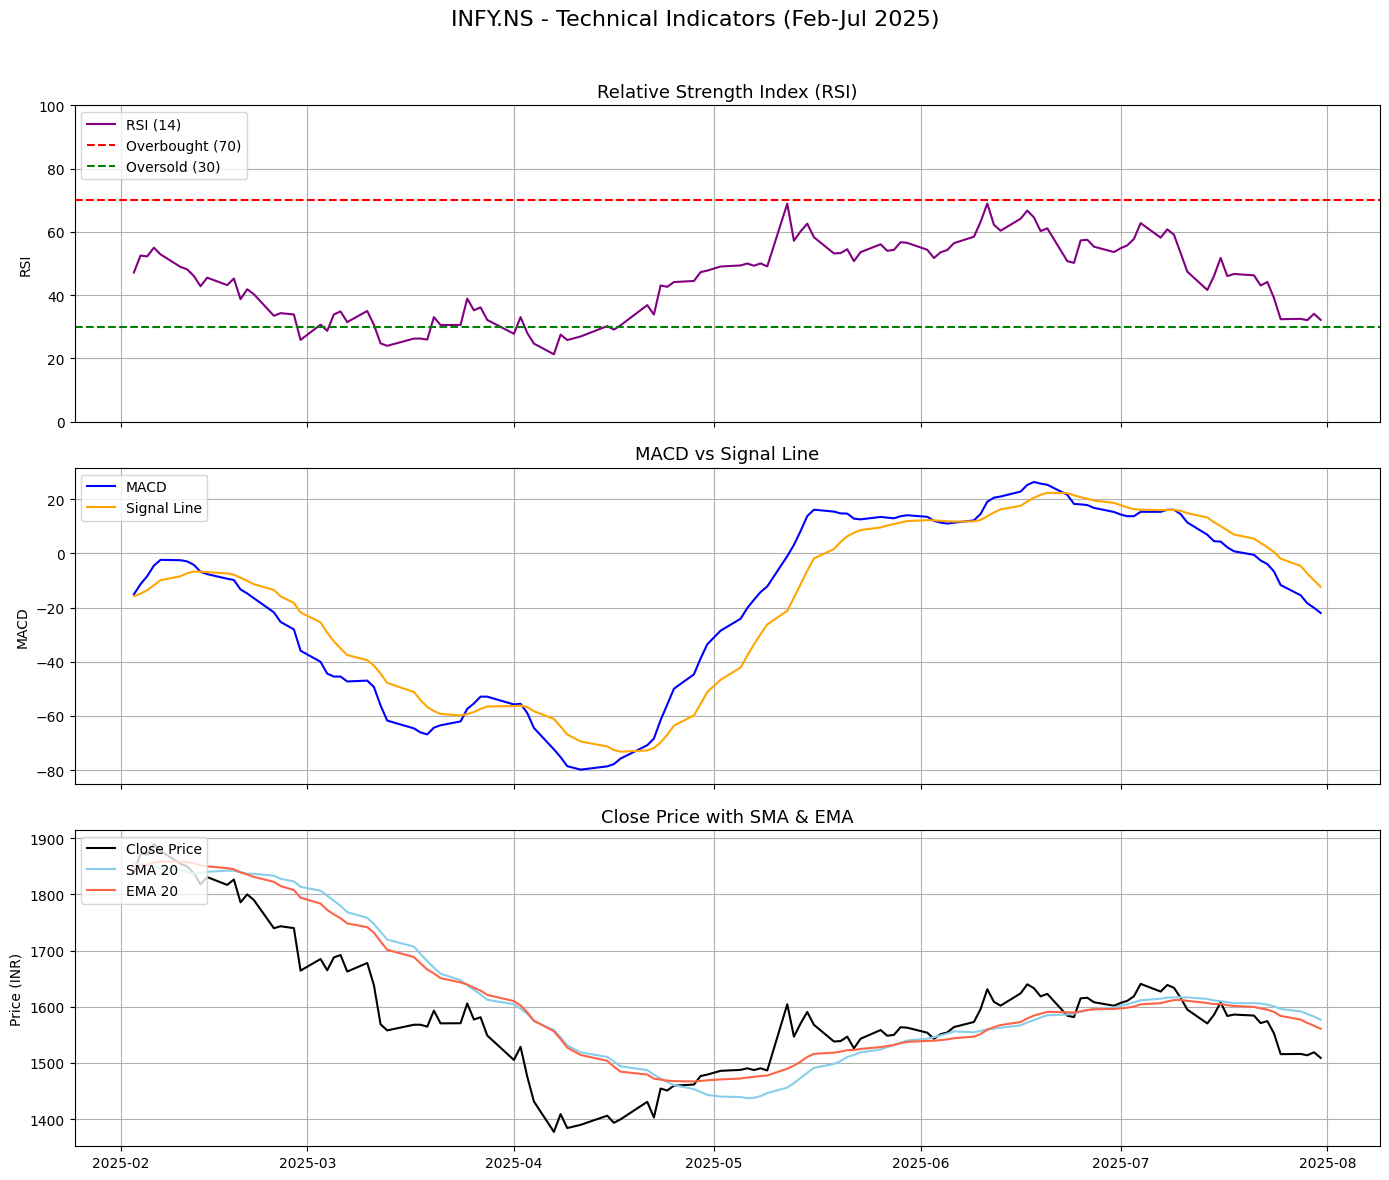


Plotting technical indicators for RELIANCE.NS (122 data points)


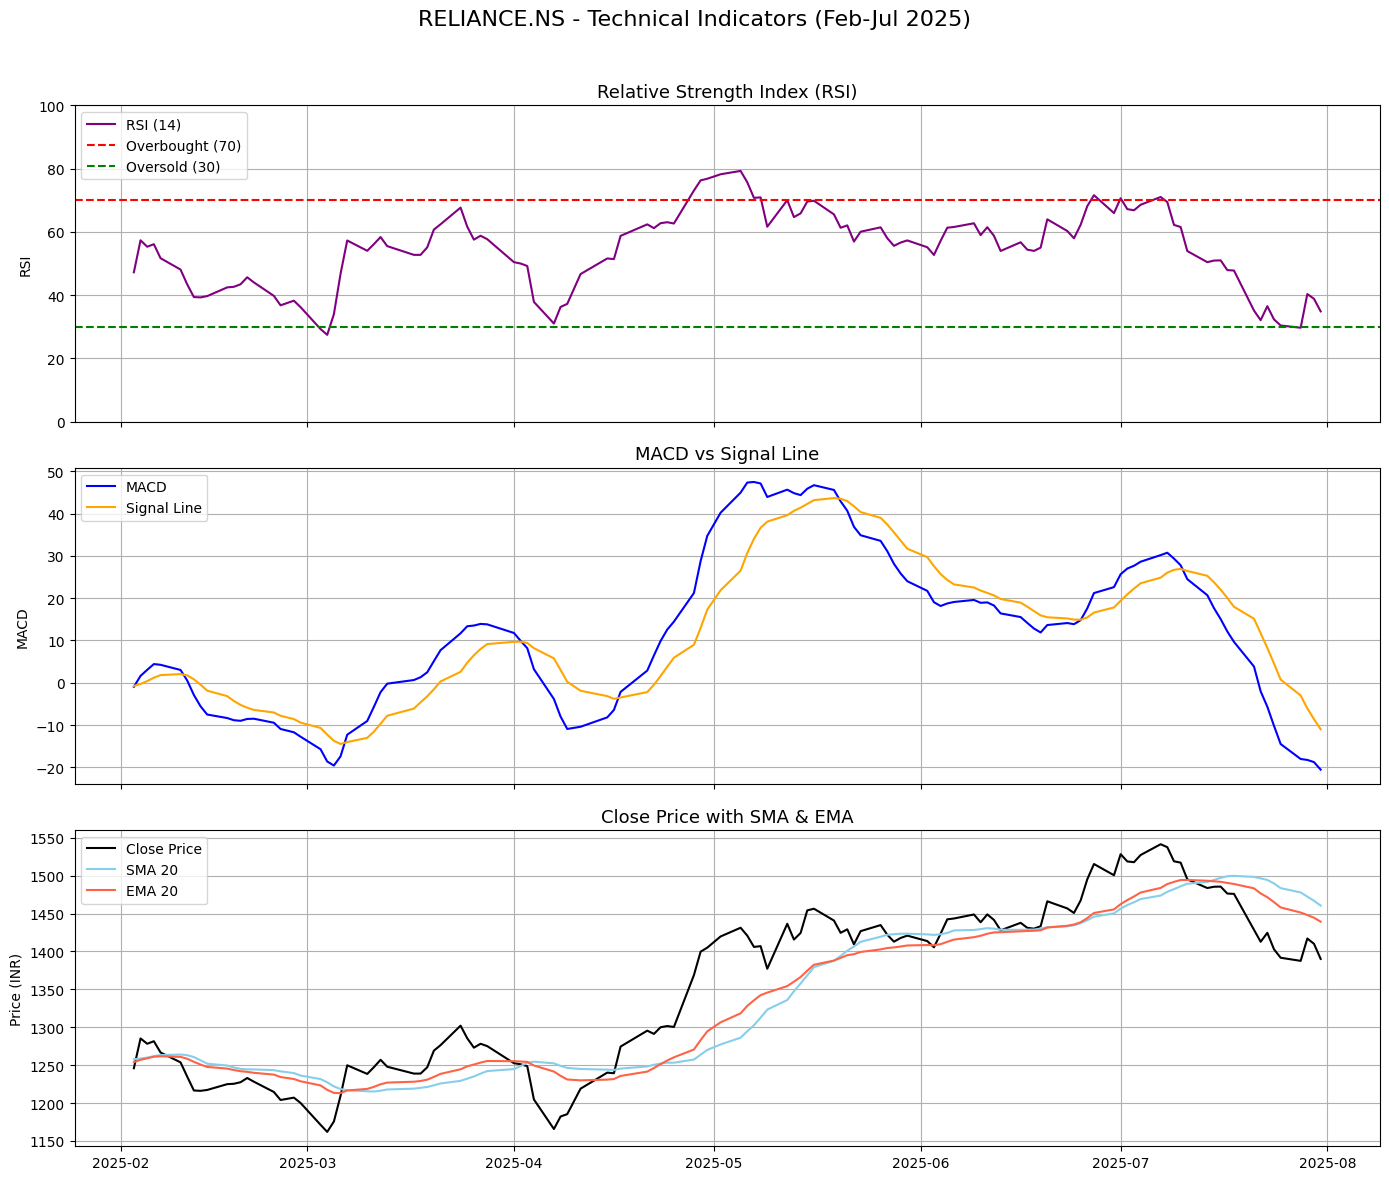


Plotting technical indicators for HDFCBANK.NS (122 data points)


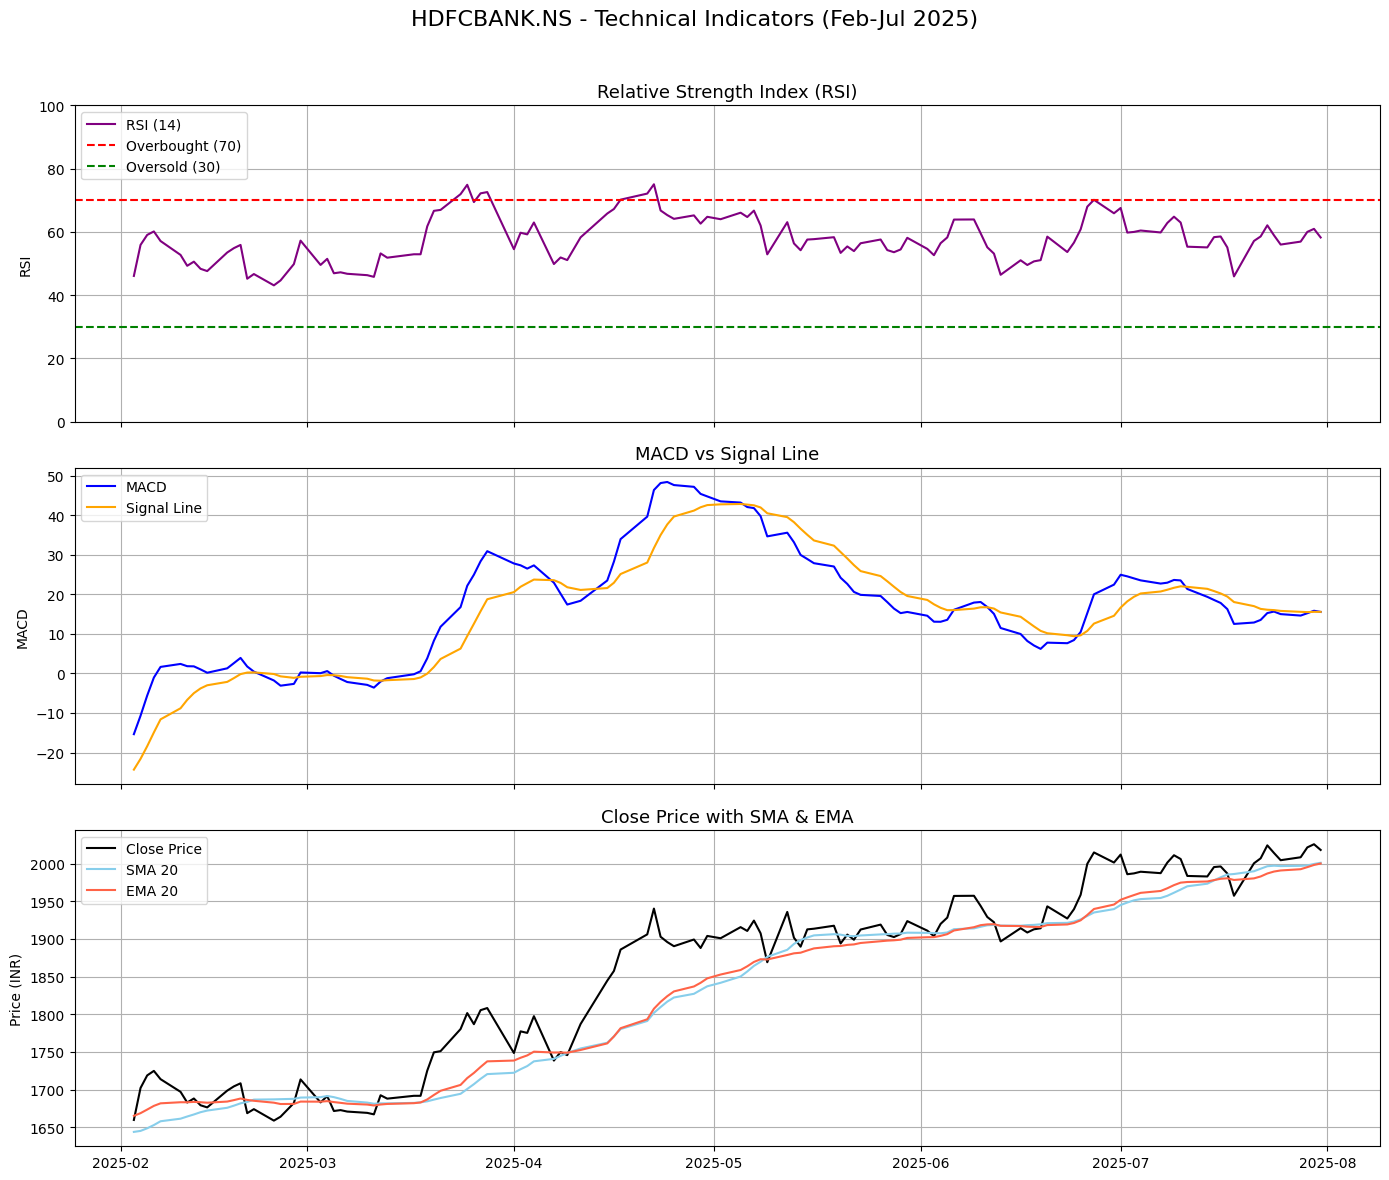

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Define symbols and backtest period (timezone-aware)
symbols = ["INFY.NS", "RELIANCE.NS", "HDFCBANK.NS"]
backtest_start = pd.to_datetime("2025-02-01", utc=True).tz_convert("Asia/Kolkata")
backtest_end = pd.to_datetime("2025-07-31", utc=True).tz_convert("Asia/Kolkata")

# Dictionary to access processed DataFrames
processed_data_dict = {
    "INFY.NS": processed_infy,
    "RELIANCE.NS": processed_reliance,
    "HDFCBANK.NS": processed_hdfcbank
}

# Visualization function
def plot_technical_indicators(symbol, data):
    # Filter data for backtest period
    data = data[(data.index >= backtest_start) & (data.index <= backtest_end)].copy()
    
    if data.empty:
        print(f"Error: No data available for {symbol} in backtest period (Feb-Jul 2025).")
        return
    
    print(f"\nPlotting technical indicators for {symbol} ({len(data)} data points)")
    
    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    fig.suptitle(f'{symbol} - Technical Indicators (Feb-Jul 2025)', fontsize=16)
    
    # RSI
    axes[0].plot(data.index, data['RSI'], label='RSI (14)', color='purple')
    axes[0].axhline(70, color='red', linestyle='--', label='Overbought (70)')
    axes[0].axhline(30, color='green', linestyle='--', label='Oversold (30)')
    axes[0].set_ylim(0, 100)
    axes[0].set_ylabel('RSI')
    axes[0].set_title('Relative Strength Index (RSI)', fontsize=13)
    axes[0].legend(loc='upper left')
    axes[0].grid(True)
    
    # MACD
    axes[1].plot(data.index, data['MACD'], label='MACD', color='blue')
    axes[1].plot(data.index, data['MACD_Signal'], label='Signal Line', color='orange')
    axes[1].set_ylabel('MACD')
    axes[1].set_title('MACD vs Signal Line', fontsize=13)
    axes[1].legend(loc='upper left')
    axes[1].grid(True)
    
    # Close + SMA + EMA
    axes[2].plot(data.index, data['Close'], label='Close Price', color='black')
    axes[2].plot(data.index, data['SMA_20'], label='SMA 20', color='skyblue')
    axes[2].plot(data.index, data['EMA_20'], label='EMA 20', color='tomato')
    axes[2].set_ylabel('Price (INR)')
    axes[2].set_title('Close Price with SMA & EMA', fontsize=13)
    axes[2].legend(loc='upper left')
    axes[2].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot for each stock
for symbol in symbols:
    if symbol in processed_data_dict and processed_data_dict[symbol] is not None:
        plot_technical_indicators(symbol, processed_data_dict[symbol])
    else:
        print(f"Error: Processed data for {symbol} not found.")

## MODEL TRAINING AND BACKTESTING


=== ML Model Training and Evaluation for INFY.NS ===
Data from 2020-10-12 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Index timezone: Asia/Kolkata
Train data points: 1068, Test data points: 122


/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:28] WARNING

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}

=== ML Model Performance ===
Accuracy: 48.36%
Precision: 48.98%
Recall: 78.69%
F1-Score: 60.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.18      0.26        61
           1       0.49      0.79      0.60        61

    accuracy                           0.48       122
   macro avg       0.47      0.48      0.43       122
weighted avg       0.47      0.48      0.43       122



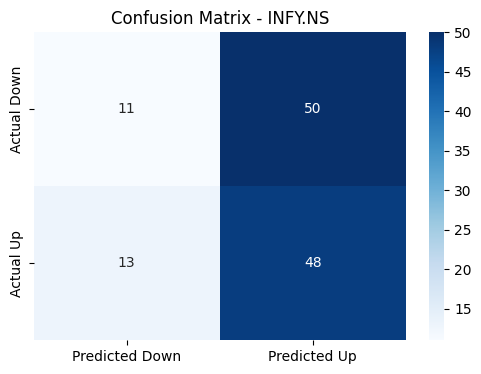

In [350]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Define periods (timezone-aware)
backtest_start = pd.to_datetime("2025-02-01", utc=True).tz_convert("Asia/Kolkata")
backtest_end = pd.to_datetime("2025-07-31", utc=True).tz_convert("Asia/Kolkata")

# Train and evaluate ML model for INFY.NS
def train_ml_infy(processed_data):
    symbol = "INFY.NS"
    print(f"\n=== ML Model Training and Evaluation for {symbol} ===")
    
    # Verify date range
    print(f"Data from {processed_data.index.min()} to {processed_data.index.max()}")
    print(f"Index timezone: {processed_data.index.tz}")
    
    # Features and target
    features = ["RSI", "MACD", "MACD_Signal", "SMA_20", "EMA_20", "Volatility"]
    X = processed_data[features]
    y = processed_data["Target"]
    
    # Split data
    train = processed_data[processed_data.index < backtest_start]
    test = processed_data[(processed_data.index >= backtest_start) & (processed_data.index <= backtest_end)]
    
    if len(test) == 0:
        print(f"Error: No data available for {symbol} in backtest period.")
        return None
    
    print(f"Train data points: {len(train)}, Test data points: {len(test)}")
    
    # Train XGBoost model
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 3, 4],
        'learning_rate': [0.01, 0.1, 0.2],
    }
    grid = GridSearchCV(
        estimator=XGBClassifier(random_state=42, class_weight='balanced'),
        param_grid=param_grid,
        scoring='precision',
        cv=TimeSeriesSplit(n_splits=5),
        verbose=0,
        n_jobs=-1
    )
    grid.fit(train[features], train["Target"])
    model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)
    
    # Evaluate on test set
    X_test = test[features]
    y_test = test["Target"]
    y_pred = model.predict(X_test)
    
    # Model performance
    print("\n=== ML Model Performance ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2%}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.2%}")
    print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0):.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Down', 'Predicted Up'],
                yticklabels=['Actual Down', 'Actual Up'])
    plt.title(f"Confusion Matrix - {symbol}")
    plt.savefig(f"{symbol}_confusion_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save model
    model.save_model("INFY_model.json")
    return model

# Run training for INFY.NS
if processed_infy is not None:
    infy_model = train_ml_infy(processed_infy)
    if infy_model is None:
        print("Error: Training failed for INFY.NS.")
else:
    print("Error: Processed data for INFY.NS not found.")


=== ML Model Training and Evaluation for RELIANCE.NS ===
Data from 2020-10-12 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Index timezone: Asia/Kolkata
Train data points: 1068, Test data points: 122


/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:21:52] WARNING

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

=== ML Model Performance ===
Accuracy: 50.82%
Precision: 50.00%
Recall: 43.33%
F1-Score: 46.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.58      0.55        62
           1       0.50      0.43      0.46        60

    accuracy                           0.51       122
   macro avg       0.51      0.51      0.50       122
weighted avg       0.51      0.51      0.51       122



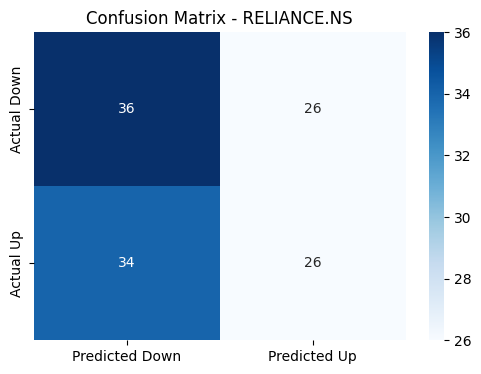

In [351]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Define periods (timezone-aware)
backtest_start = pd.to_datetime("2025-02-01", utc=True).tz_convert("Asia/Kolkata")
backtest_end = pd.to_datetime("2025-07-31", utc=True).tz_convert("Asia/Kolkata")

# Train and evaluate ML model for RELIANCE.NS
def train_ml_reliance(processed_data):
    symbol = "RELIANCE.NS"
    print(f"\n=== ML Model Training and Evaluation for {symbol} ===")
    
    # Verify date range
    print(f"Data from {processed_data.index.min()} to {processed_data.index.max()}")
    print(f"Index timezone: {processed_data.index.tz}")
    
    # Features and target
    features = ["RSI", "MACD", "MACD_Signal", "SMA_20", "EMA_20", "Volatility"]
    X = processed_data[features]
    y = processed_data["Target"]
    
    # Split data
    train = processed_data[processed_data.index < backtest_start]
    test = processed_data[(processed_data.index >= backtest_start) & (processed_data.index <= backtest_end)]
    
    if len(test) == 0:
        print(f"Error: No data available for {symbol} in backtest period.")
        return None
    
    print(f"Train data points: {len(train)}, Test data points: {len(test)}")
    
    # Train XGBoost model
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 3, 4],
        'learning_rate': [0.01, 0.1, 0.2],
    }
    grid = GridSearchCV(
        estimator=XGBClassifier(random_state=42, class_weight='balanced'),
        param_grid=param_grid,
        scoring='precision',
        cv=TimeSeriesSplit(n_splits=5),
        verbose=0,
        n_jobs=-1
    )
    grid.fit(train[features], train["Target"])
    model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)
    
    # Evaluate on test set
    X_test = test[features]
    y_test = test["Target"]
    y_pred = model.predict(X_test)
    
    # Model performance
    print("\n=== ML Model Performance ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2%}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.2%}")
    print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0):.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Down', 'Predicted Up'],
                yticklabels=['Actual Down', 'Actual Up'])
    plt.title(f"Confusion Matrix - {symbol}")
    plt.savefig(f"{symbol}_confusion_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save model
    model.save_model("RELIANCE_model.json")
    return model

# Run training for RELIANCE.NS
if processed_reliance is not None:
    reliance_model = train_ml_reliance(processed_reliance)
    if reliance_model is None:
        print("Error: Training failed for RELIANCE.NS.")
else:
    print("Error: Processed data for RELIANCE.NS not found.")


=== ML Model Training and Evaluation for HDFCBANK.NS ===
Data from 2020-10-12 00:00:00+05:30 to 2025-08-01 00:00:00+05:30
Index timezone: Asia/Kolkata
Train data points: 1068, Test data points: 122


/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:22:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:22:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:22:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/devayushrout/Desktop/Stock market project/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [11:22:00] WARNING

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}

=== ML Model Performance ===
Accuracy: 45.90%
Precision: 55.56%
Recall: 21.74%
F1-Score: 31.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.77      0.55        53
           1       0.56      0.22      0.31        69

    accuracy                           0.46       122
   macro avg       0.49      0.50      0.43       122
weighted avg       0.50      0.46      0.42       122



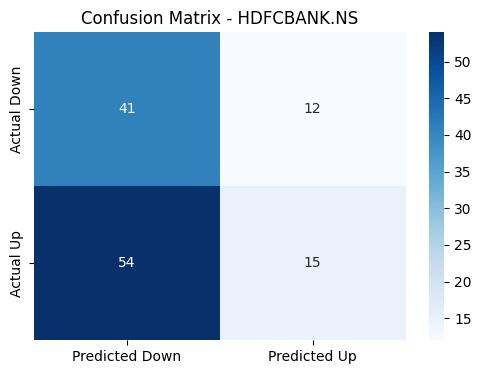

In [352]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Define periods (timezone-aware)
backtest_start = pd.to_datetime("2025-02-01", utc=True).tz_convert("Asia/Kolkata")
backtest_end = pd.to_datetime("2025-07-31", utc=True).tz_convert("Asia/Kolkata")

# Train and evaluate ML model for HDFCBANK.NS
def train_ml_hdfcbank(processed_data):
    symbol = "HDFCBANK.NS"
    print(f"\n=== ML Model Training and Evaluation for {symbol} ===")
    
    # Verify date range
    print(f"Data from {processed_data.index.min()} to {processed_data.index.max()}")
    print(f"Index timezone: {processed_data.index.tz}")
    
    # Features and target
    features = ["RSI", "MACD", "MACD_Signal", "SMA_20", "EMA_20", "Volatility"]
    X = processed_data[features]
    y = processed_data["Target"]
    
    # Split data
    train = processed_data[processed_data.index < backtest_start]
    test = processed_data[(processed_data.index >= backtest_start) & (processed_data.index <= backtest_end)]
    
    if len(test) == 0:
        print(f"Error: No data available for {symbol} in backtest period.")
        return None
    
    print(f"Train data points: {len(train)}, Test data points: {len(test)}")
    
    # Train XGBoost model
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 3, 4],
        'learning_rate': [0.01, 0.1, 0.2],
    }
    grid = GridSearchCV(
        estimator=XGBClassifier(random_state=42, class_weight='balanced'),
        param_grid=param_grid,
        scoring='precision',
        cv=TimeSeriesSplit(n_splits=5),
        verbose=0,
        n_jobs=-1
    )
    grid.fit(train[features], train["Target"])
    model = grid.best_estimator_
    print("Best Parameters:", grid.best_params_)
    
    # Evaluate on test set
    X_test = test[features]
    y_test = test["Target"]
    y_pred = model.predict(X_test)
    
    # Model performance
    print("\n=== ML Model Performance ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2%}")
    print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.2%}")
    print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0):.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Down', 'Predicted Up'],
                yticklabels=['Actual Down', 'Actual Up'])
    plt.title(f"Confusion Matrix - {symbol}")
    plt.savefig(f"{symbol}_confusion_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save model
    model.save_model("HDFCBANK_model.json")
    return model

# Run training for HDFCBANK.NS
if processed_hdfcbank is not None:
    hdfcbank_model = train_ml_hdfcbank(processed_hdfcbank)
    if hdfcbank_model is None:
        print("Error: Training failed for HDFCBANK.NS.")
else:
    print("Error: Processed data for HDFCBANK.NS not found.")